# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) yang dibutuhkan.

In [33]:
# ====== Manipulasi dan Analisis Data ======
import pandas as pd            # Untuk membaca dan memproses data tabular (seperti file CSV)
import numpy as np             # Untuk operasi numerik dan array multidimensi

# ====== Visualisasi Data ======
import matplotlib.pyplot as plt    # Untuk membuat berbagai jenis grafik visual
import seaborn as sns             # Untuk visualisasi statistik yang menarik dan informatif

# ====== Progres Bar ======
from tqdm import tqdm             # Untuk menampilkan progress bar saat melakukan loop besar (misalnya preprocessing data)

# ====== Text Preprocessing ======
import re                         # Untuk memproses dan memanipulasi teks menggunakan regex
import string                     # Untuk manipulasi karakter seperti tanda baca
import nltk                       # Library NLP untuk preprocessing teks
nltk.download('punkt')            # Unduh resource untuk tokenizer
nltk.download('stopwords')        # Unduh daftar stopwords (kata umum yang diabaikan)
nltk.download('punkt_tab')        # Tambahan resource tokenizer (opsional)

from nltk.tokenize import word_tokenize         # Untuk memecah teks menjadi kata-kata (token)
from nltk.corpus import stopwords               # Untuk mengakses stopwords

# ====== Library untuk Bahasa Indonesia ======
!pip install sastrawi                            # Install library Sastrawi (jika belum terpasang)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory                 # Untuk stemming Bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Untuk menghapus stopwords Bahasa Indonesia

# ====== Scikit-learn (Machine Learning) ======
from sklearn.model_selection import train_test_split           # Membagi dataset menjadi data latih dan uji
from sklearn.feature_extraction.text import TfidfVectorizer    # Mengubah teks menjadi vektor angka berbasis TF-IDF
from sklearn.ensemble import RandomForestClassifier            # Algoritma klasifikasi Random Forest
from sklearn.metrics import accuracy_score, classification_report  # Evaluasi performa model
from sklearn.preprocessing import LabelEncoder                 # Mengubah label kategorikal menjadi angka

# ====== Modeling dengan Deep Learning ======
import tensorflow as tf                                        # Framework untuk deep learning
from tensorflow.keras.models import Sequential                 # Untuk membuat model neural network secara berurutan
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional  # Layer-layer penting dalam deep learning
from tensorflow.keras.preprocessing.text import Tokenizer      # Mengubah teks ke dalam bentuk token angka
from tensorflow.keras.preprocessing.sequence import pad_sequences # Menyamakan panjang input untuk neural network
from tensorflow.keras.utils import to_categorical              # Mengubah label ke bentuk one-hot encoding

# ====== Evaluasi Model ======
from sklearn.metrics import accuracy_score                     # Untuk menghitung akurasi model


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **2. Memuat dataset**

In [34]:
df = pd.read_csv("/content/ulasan_tokopedia_new.csv")

In [35]:
# Melihat 5 baris awal df
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b6ce7a92-8644-48af-ba47-c6b5f526c35e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apa sih kurir belom aja dateng keruma tiba tib...,1,0,3.305.0,2025-04-11 21:54:55,"Toppers, mohon maaf atas kendala yang kamu ala...",2025-04-11 22:00:04,3.305.0
1,cdcc06bc-dfc9-4276-a135-120629f11185,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tokopedia terbaik semogo mendapatkan rejeki ya...,5,0,3.305.0,2025-04-11 21:32:29,"Hi Toppers, terima kasih untuk rating dan ulas...",2025-04-11 22:07:03,3.305.0
2,70afc5fc-cb4e-4f25-857c-fe4d2cc3c189,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,best,5,0,3.305.0,2025-04-11 21:23:24,"Hi Toppers, terima kasih untuk rating dan ulas...",2025-04-11 21:47:01,3.305.0
3,c174b9ea-771d-4488-8fb5-4e61b0896e70,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menyesal langganan PLUS 6 bulan tetap dikenaka...,1,0,3.305.0,2025-04-11 21:17:58,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-11 21:47:03,3.305.0
4,166f356c-aab8-4d75-9baf-844928b911dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5bintang,5,0,NaN,2025-04-11 20:00:07,"Toppers, terima kasih atas rating yang kamu be...",2025-04-11 20:27:02,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              100000 non-null  object
 1   userName              100000 non-null  object
 2   userImage             100000 non-null  object
 3   content               99999 non-null   object
 4   score                 100000 non-null  int64 
 5   thumbsUpCount         100000 non-null  int64 
 6   reviewCreatedVersion  80803 non-null   object
 7   at                    100000 non-null  object
 8   replyContent          98203 non-null   object
 9   repliedAt             98203 non-null   object
 10  appVersion            80803 non-null   object
dtypes: int64(2), object(9)
memory usage: 8.4+ MB


# **3. Data Cleaning**

### Missing Values

In [37]:
#Melihat jumlah missing values
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,19197
at,0
replyContent,1797
repliedAt,1797


In [38]:
# Menghapus Missing Values
df.dropna(inplace=True)
df.isnull().sum()


,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


### Duplikasi Data

In [39]:
# Melihat Duplikasi Data
df.duplicated().sum()

np.int64(0)

### Membuat dataFrame Baru

In [40]:
# Membuat data frame baru yang sudah dibersihkan
df_sentiment = df[['content', 'score']].copy()

# Menampilkan 5 baris pertama untuk cek
print(df_sentiment.head())


                                             content  score
0  apa sih kurir belom aja dateng keruma tiba tib...      1
1  tokopedia terbaik semogo mendapatkan rejeki ya...      5
2                                               best      5
3  Menyesal langganan PLUS 6 bulan tetap dikenaka...      1
5  kalau bisa tokopedia sediakan layanan pay latt...      5


In [41]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79524 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  79524 non-null  object
 1   score    79524 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [42]:
# Melihat 10 sample kolom content
df_sentiment['content'].sample(10)

,content
12906,"CATATAN BUAT KURIRNYA MASA 45 KATA DOANG, TAMB..."
32233,banyak barang dgn harga murah2
57039,"So far seneng belanja di tokopedia, tapi untuk..."
59226,mantab murah nya
33582,lancar jaya untuk blanja hari ini. Tolong admi...
97086,"Pengiriman kurir rekomendasi jelek, maen ubah ..."
67482,Proses penarikan saldonya lama sekali
57668,Telat satu hari denda 50.000. Ini aplikasi uda...
21773,Tokped jadi ga jelas setelah gabung sama tikto...
65773,bagus


# **4. Text Processing**

### Case Folding

In [43]:
# casefolding -> mengubah karakter huruf menjadi huruf kecil
df_sentiment["content"] = df_sentiment["content"].str.lower()
df_sentiment.head()

,content,score
0,apa sih kurir belom aja dateng keruma tiba tib...,1
1,tokopedia terbaik semogo mendapatkan rejeki ya...,5
2,best,5
3,menyesal langganan plus 6 bulan tetap dikenaka...,1
5,kalau bisa tokopedia sediakan layanan pay latt...,5


### Menghapus Punctuation

In [44]:
# contoh load punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#fungsi untuk menghapus punctuation
def remove_punc(text):
  for punc in string.punctuation:
    text = text.replace(punc, " ")
  return text

In [46]:
# menjalankan fungsi remove_punc
df_sentiment["content"] = df["content"].apply(lambda x: remove_punc(x))
df_sentiment.head()

,content,score
0,apa sih kurir belom aja dateng keruma tiba tib...,1
1,tokopedia terbaik semogo mendapatkan rejeki ya...,5
2,best,5
3,Menyesal langganan PLUS 6 bulan tetap dikenaka...,1
5,kalau bisa tokopedia sediakan layanan pay latt...,5


### Preprocess Text

In [47]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.strip()              # Hapus spasi
    words = text.split()             # Tokenisasi (split jadi list kata)
    return ' '.join(words)
df_sentiment['content'] = df_sentiment['content'].apply(preprocess_text)

### Slang Word dan Stopword

In [48]:
fSlang = "/content/new_kamusalay.csv"
sw = open(fSlang, encoding='utf-8', errors='ignore', mode='r')
SlangS = sw.readlines()
sw.close()
SlangS = {slang.strip().split(',')[0]: slang.strip().split(',')[1] for slang in SlangS}


In [49]:
#load csv stopwordbahasa
fStop = "/content/stopwordbahasa.csv"
st = open(fStop, encoding='utf-8', errors ='ignore', mode='r');StopS = st.readlines(); st.close()
StopS = {Stop.strip() for Stop in StopS}

In [50]:
#membuat fungsi untuk stopword dan slangword
def formaldanstop(t):
  t = t.split()
  for i,x in enumerate(t):
    if x in SlangS.keys():
      t[i] = SlangS[x]
  return ''.join(' '.join(x for x in t if x not in StopS))

### Remove duplicate

In [51]:
import re
def remove_duplicate_letters(text):
  return re.sub(r'(.)\1+', r'\1', text)

In [52]:
df_sentiment['cleaned_content'] = df_sentiment['content'].apply(lambda x: remove_duplicate_letters(formaldanstop(x)))

### Melihat 20 baris awal df_sentiment

In [53]:
df_sentiment[['content', 'cleaned_content']].head(20)

,content,cleaned_content
0,apa sih kurir belom aja dateng keruma tiba tib...,kurir keruma diretur komplain toped ditolak to...
1,tokopedia terbaik semogo mendapatkan rejeki ya...,tokopedia terbaik semogo rejeki berlimpah amin
2,best,best
3,Menyesal langganan PLUS bulan tetap dikenakan ...,Menyesal langanan PLUS dikenakan biaya layanan...
5,kalau bisa tokopedia sediakan layanan pay latt...,tokopedia sediakan layanan pay later via dana ...
8,agak kecewa sama tokped skrg udah susah cari l...,kecewa tokped susah cari liquid ditokped pakai...
9,mantap recommended e commerce platform,mantap recomended e comerce platform
10,mantul smart,mantap betul pintar
11,luas biasa,luas
13,banyak toko yang menipu konsemen,toko menipu konsemen


### Labelling Data

In [54]:
# Proses pelabelan
def label_sentiment(score):
    if score in [1, 2]:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score in [4, 5]:
        return 'Positif'

# Menerapkan pelabelan ke dataset
df_sentiment['sentiment'] = df_sentiment['score'].apply(label_sentiment)

# Mengecek distribusi label
df_sentiment['sentiment'].value_counts()


,count
sentiment,
Positif,48682
Negatif,27307
Netral,3535


### WordCloud

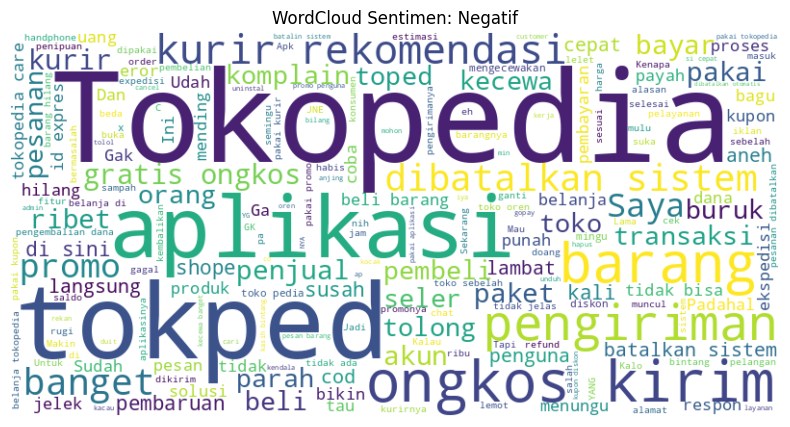

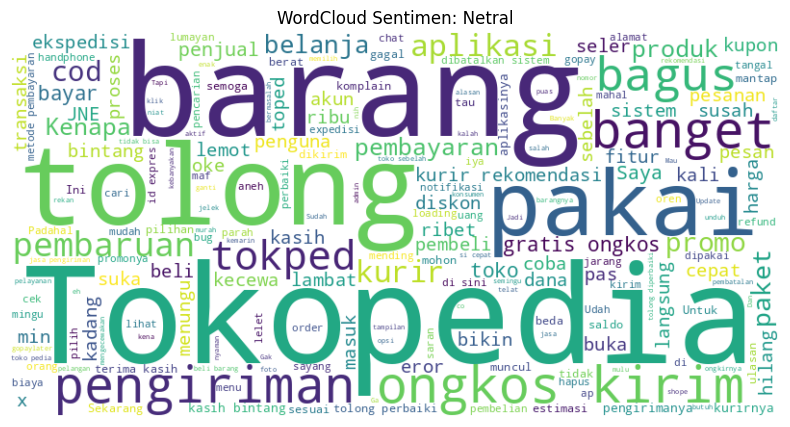

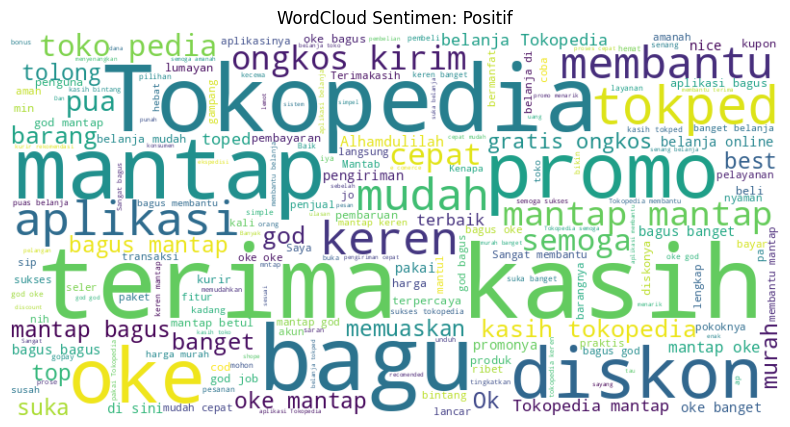

In [55]:
# Before using WordCloud, import it
from wordcloud import WordCloud

# Membuat WorldCloud
def plot_wordcloud_by_sentiment(df, sentiment_label):
    text = ' '.join(df[df['sentiment'] == sentiment_label]['cleaned_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Sentimen: {sentiment_label}')
    plt.show()

# Visualisasi sentimen
for label in ['Negatif', 'Netral', 'Positif']:
    plot_wordcloud_by_sentiment(df_sentiment, label)

# **5. Modelling**

### **PELATIHAN RANDOM FOREST DAN EKSTRAKSI FITUR TF-IDF**

#### Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_sentiment['label'] = le.fit_transform(df_sentiment['sentiment'])  # negatif=0, netral=1, positif=2


#### TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_sentiment['cleaned_content']).toarray()
y = df_sentiment['label']

#### Split Data

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

#### Evaluasi Model

In [60]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Hasil Evaluasi
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, target_names=le.classes_))

Train Accuracy: 0.9849573240698534
Test Accuracy: 0.8777114115058158
              precision    recall  f1-score   support

     Negatif       0.79      0.93      0.85      5461
      Netral       0.17      0.01      0.02       707
     Positif       0.94      0.91      0.93      9737

    accuracy                           0.88     15905
   macro avg       0.63      0.62      0.60     15905
weighted avg       0.85      0.88      0.86     15905



### **Pelatihan DNN dan Ekstraksi Fitur TF-IDF**

#### Label Encoding

In [61]:
le = LabelEncoder()
df_sentiment['label'] = le.fit_transform(df_sentiment['sentiment'])  # negatif=0, netral=1, positif=2

#### TF-IDF

In [62]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_sentiment['cleaned_content']).toarray()
y = to_categorical(df_sentiment['label'])  # one-hot encoding


#### Split Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### DNN Model

In [64]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # jumlah kelas = 3
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.8445 - loss: 0.4379 - val_accuracy: 0.8867 - val_loss: 0.3385
Epoch 2/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9009 - loss: 0.3011 - val_accuracy: 0.8865 - val_loss: 0.3496
Epoch 3/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.9084 - loss: 0.2736 - val_accuracy: 0.8848 - val_loss: 0.3565
Epoch 4/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.9232 - loss: 0.2334 - val_accuracy: 0.8832 - val_loss: 0.3791
Epoch 5/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9393 - loss: 0.1928 - val_accuracy: 0.8787 - val_loss: 0.4329
Epoch 6/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.9543 - loss: 0.1519 - val_accuracy: 0.8777 - val_loss: 0.4878
Epoch 7/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9617 - loss: 0.1266 - val_accuracy: 0.8790 - val_loss: 0.5451
Epoch 8/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.9666 - loss: 0.1147 - 

#### Evaluasi Model

In [65]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Train Accuracy: 0.9799
Test Accuracy: 0.8788
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

     Negatif       0.83      0.89      0.86      5461
      Netral       0.16      0.05      0.08       707
     Positif       0.93      0.93      0.93      9737

    accuracy                           0.88     15905
   macro avg       0.64      0.63      0.62     15905
weighted avg       0.86      0.88      0.87     15905




### **Pelatihan BiLSTM dan Ekstraksi Fitur Tokenizer**

#### Tokenizer

In [66]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_sentiment['cleaned_content'])

sequences = tokenizer.texts_to_sequences(df_sentiment['cleaned_content'])
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)


#### Label Encoding

In [67]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(df_sentiment['sentiment']))  # negatif=0, netral=1, positif=2


#### Split Data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


#### BiLSTM Model

In [69]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Jumlah kelas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


995/995 ━━━━━━━━━━━━━━━━━━━━ 248s 238ms/step - accuracy: 0.8354 - loss: 0.4657 - val_accuracy: 0.8878 - val_loss: 0.3416
Epoch 2/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 242s 243ms/step - accuracy: 0.9006 - loss: 0.3038 - val_accuracy: 0.8859 - val_loss: 0.3453
Epoch 3/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 242s 243ms/step - accuracy: 0.9098 - loss: 0.2734 - val_accuracy: 0.8804 - val_loss: 0.3682
Epoch 4/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 263s 244ms/step - accuracy: 0.9152 - loss: 0.2503 - val_accuracy: 0.8805 - val_loss: 0.3769
Epoch 5/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 251s 233ms/step - accuracy: 0.9224 - loss: 0.2316 - val_accuracy: 0.8809 - val_loss: 0.3886
Epoch 6/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 261s 232ms/step - accuracy: 0.9303 - loss: 0.2103 - val_accuracy: 0.8725 - val_loss: 0.4220
Epoch 7/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 267s 238ms/step - accuracy: 0.9396 - loss: 0.1889 - val_accuracy: 0.8724 - val_loss: 0.4637
Epoch 8/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 238s 239ms/step - accuracy: 0.9449 - loss: 0.17

#### Evaluasi Model

In [70]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


Train Accuracy: 0.9577
Test Accuracy: 0.8689
498/498 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step
              precision    recall  f1-score   support

     Negatif       0.83      0.86      0.85      5461
      Netral       0.20      0.13      0.16       707
     Positif       0.92      0.93      0.92      9737

    accuracy                           0.87     15905
   macro avg       0.65      0.64      0.64     15905
weighted avg       0.86      0.87      0.86     15905



### **Pelatihan SVM dan Ekstraksi Fitur TF-IDF**

#### TF-IDF

In [71]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df_sentiment['cleaned_content'])


#### Label Encoding

In [72]:
le = LabelEncoder()
y = le.fit_transform(df_sentiment['sentiment'])  # negatif=0, netral=1, positif=2


#### Split Data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

####  SVM Model

In [74]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

### Evaluasi Model

In [75]:
train_acc = accuracy_score(y_train, svm_model.predict(X_train))
test_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

y_pred = svm_model.predict(X_test)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Train Accuracy: 0.9328
Test Accuracy:  0.8914

Classification Report (Test Set):
              precision    recall  f1-score   support

     Negatif       0.82      0.93      0.87      5461
      Netral       0.20      0.00      0.00       707
     Positif       0.94      0.93      0.94      9737

    accuracy                           0.89     15905
   macro avg       0.65      0.62      0.60     15905
weighted avg       0.86      0.89      0.87     15905



#### Evaluasi Model

In [80]:
train_acc = accuracy_score(y_train, rf_model.predict(X_train))
test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

y_pred = rf_model.predict(X_test)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Train Accuracy: 0.9869
Test Accuracy:  0.8751

Classification Report (Test Set):
              precision    recall  f1-score   support

     Negatif       0.79      0.92      0.85      8192
      Netral       0.18      0.01      0.01      1061
     Positif       0.93      0.91      0.92     14605

    accuracy                           0.88     23858
   macro avg       0.64      0.61      0.60     23858
weighted avg       0.85      0.88      0.86     23858



# **Kesimpulan**

1. **Model Random Forest (TF-IDF)**  
   - Akurasi data latih: 98.49%  
   - Akurasi data uji: 87.77%  
   - Memiliki akurasi pelatihan tertinggi, menunjukkan kemampuan sangat baik dalam mempelajari data latih.  
   - Akurasi pada data uji cukup tinggi, meskipun sedikit lebih rendah dibanding SVM.  

2. **Model DNN (TF-IDF)**  
   - Akurasi data latih: 97.99%  
   - Akurasi data uji: 87.88%  
   - Menunjukkan performa yang kuat dan seimbang, baik pada data latih maupun data uji.  
   - Selisih akurasi pelatihan dan pengujian kecil, menandakan model cukup stabil.

3. **Model BiLSTM (Tokenizer)**  
   - Akurasi data latih: 95.77%  
   - Akurasi data uji: 86.89%  
   - Memiliki performa yang baik, terutama pada data latih.  
   - Akurasi uji sedikit lebih rendah dibanding model lainnya, namun masih tergolong tinggi.

4. **Model SVM (TF-IDF)**  
   - Akurasi data latih: 93.23%  
   - Akurasi data uji: 89.11%  
   - Memiliki akurasi uji tertinggi di antara semua model yang diuji.  
   - Performa cukup seimbang dan menunjukkan generalisasi yang baik terhadap data baru.

4. **Model SVM (TF-IDF)**  
   - Akurasi data latih: 93.23%  
   - Akurasi data uji: 89.11%  
   - Memiliki akurasi uji tertinggi di antara semua model yang diuji.  
   - Performa cukup seimbang dan menunjukkan generalisasi yang baik terhadap data baru.
   
5. **Kesimpulan Akhir**  
   - Jika fokus utama adalah akurasi pada data uji, maka SVM (TF-IDF) adalah pilihan terbaik karena memberikan hasil pengujian tertinggi.  
   - Jika mempertimbangkan akurasi pelatihan sebagai indikator kekuatan model dalam mempelajari data, maka Random Forest (TF-IDF) unggul dengan akurasi latih tertinggi.  
   - DNN (TF-IDF) juga merupakan pilihan yang solid karena konsisten baik pada data latih maupun uji.  
   - BiLSTM (Tokenizer) tetap layak dipertimbangkan, terutama bila pendekatan berbasis arsitektur neural network berurutan lebih sesuai dengan kebutuhan aplikasi.

Pemilihan akhir model terbaik tetap tergantung pada tujuan spesifik dari sistem yang dibangun, apakah lebih mengutamakan kekuatan pemodelan, ketepatan prediksi, atau kemampuan generalisasi.

## **6. Inference atau Testing**

In [86]:
import pickle

# Save the SVM model
filename = 'svm_tfidf_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

# Save the TF-IDF vectorizer
filename_tfidf = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf, open(filename_tfidf, 'wb'))

# Save the label encoder
filename_le = 'label_encoder.pkl'
pickle.dump(le, open(filename_le, 'wb'))

print("Model, TF-IDF vectorizer, dan Label Encoder telah disimpan dalam format PKL.")

Model, TF-IDF vectorizer, dan Label Encoder telah disimpan dalam format PKL.


In [87]:
import pickle

# Load the SVM model
svm_model = pickle.load(open('svm_tfidf_model.pkl', 'rb'))

# Load the TF-IDF vectorizer
tfidf = pickle.load(open('tfidf_vectorizer.pkl', 'rb')

# Load the label encoder
le = pickle.load(open('label_encoder.pkl', 'rb'))

In [88]:
from google.colab import files

files.download('svm_tfidf_model.pkl')
files.download('tfidf_vectorizer.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
import pickle
import re
import string

# Muat slang words
fSlang = "/content/new_kamusalay.csv"
sw = open(fSlang, encoding='utf-8', errors='ignore', mode='r')
SlangS = sw.readlines()
sw.close()
SlangS = {slang.strip().split(',')[0]: slang.strip().split(',')[1] for slang in SlangS}

# Muat stopwords
fStop = "/content/stopwordbahasa.csv"
st = open(fStop, encoding='utf-8', errors='ignore', mode='r')
StopS = st.readlines()
st.close()
StopS = {Stop.strip() for Stop in StopS}

# Load the models (ubah ekstensi file menjadi .pkl)
svm_model = pickle.load(open('svm_tfidf_model.pkl', 'rb'))
tfidf = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

# Fungsi untuk slang words dan stopwords
def formaldanstop(t):
    t = t.split()
    for i, x in enumerate(t):
        if x in SlangS.keys():
            t[i] = SlangS[x]
    return ' '.join(x for x in t if x not in StopS)

# Fungsi untuk remove duplicate letters
def remove_duplicate_letters(text):
    return re.sub(r'(.)\1+', r'\1', text)

# Fungsi untuk memprediksi sentiment
def predict_sentiment(new_text):
    # Preprocessing
    new_text = new_text.lower()  # Case folding
    new_text = re.sub(r'\d+', '', new_text)  # Remove numbers
    new_text = re.sub(r'[^\w\s]', '', new_text)  # Remove punctuation

    # Gunakan slang word dan stopword removal
    new_text = formaldanstop(new_text)

    # Gunakan function to remove duplicate letters
    new_text = remove_duplicate_letters(new_text)

    # Membuat TF-IDF features
    new_text_features = tfidf.transform([new_text])

    # Membuat prediksi
    prediction = svm_model.predict(new_text_features)

    # Sentimen label
    sentiment_label = le.inverse_transform(prediction)[0]

    return sentiment_label

# Contoh Penggunaan
new_text = "Produk ini sangat bagus dan berkualitas tinggi!"
predicted_sentiment = predict_sentiment(new_text)
print(f"Sentiment for '{new_text}': {predicted_sentiment}")

Sentiment for 'Produk ini sangat bagus dan berkualitas tinggi!': Positif
